In [1]:
# Importing the libraries :

# Explore the Data :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Data preprocessing Libraries :
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Regression Libraries :
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

df = pd.read_csv("housing.csv")
df.head(10)

D:\anacoda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [2]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
df['total_bedrooms'].fillna(0,inplace = True)

In [4]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF1B921358>,
      dtype=object)

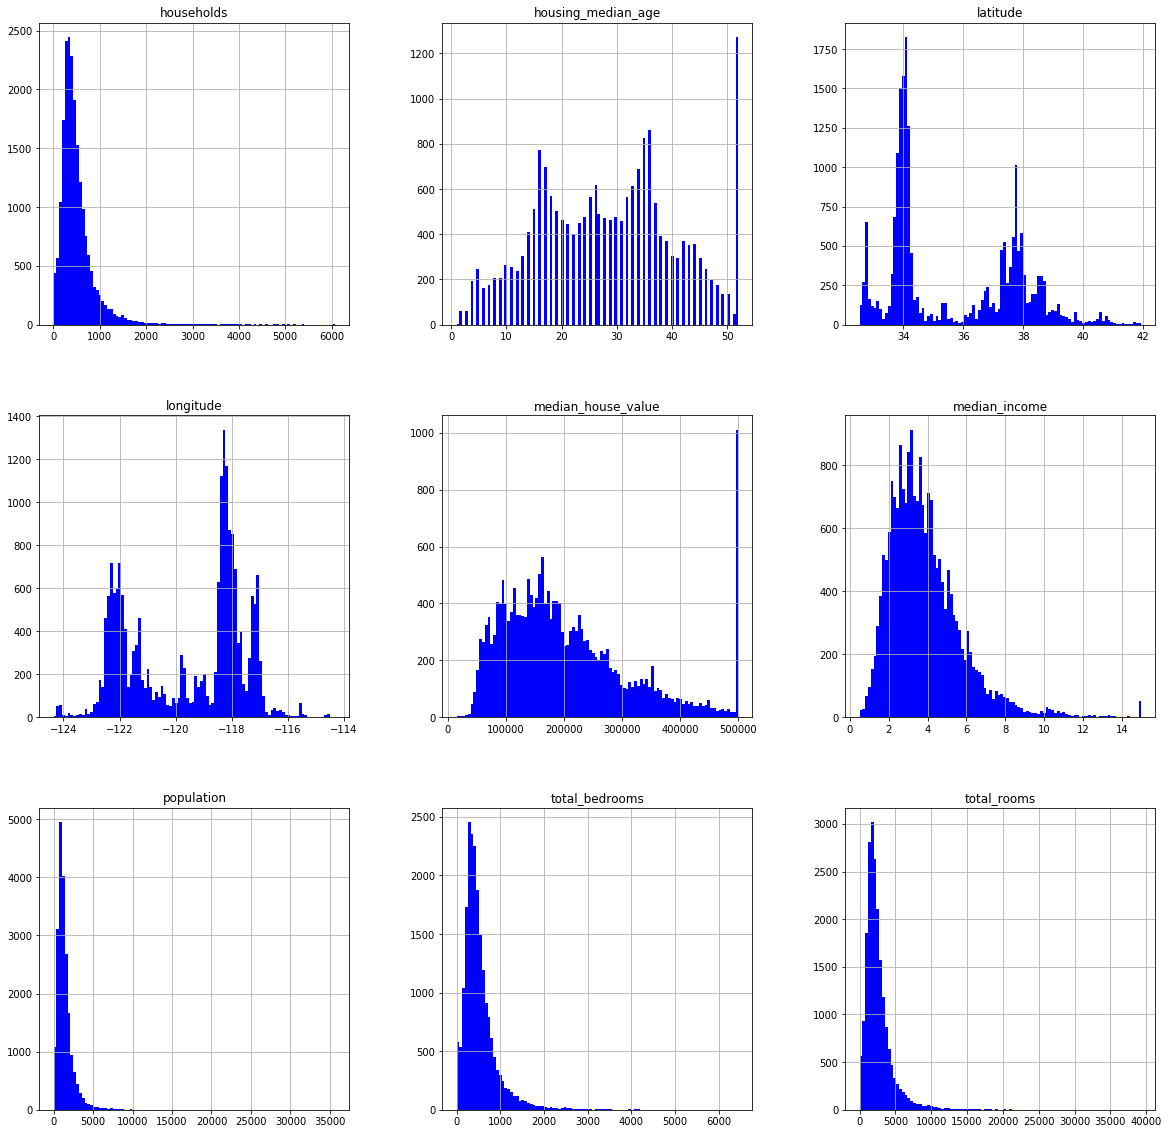

In [6]:
df.hist(bins=100, figsize=(20,20) , color = 'b')

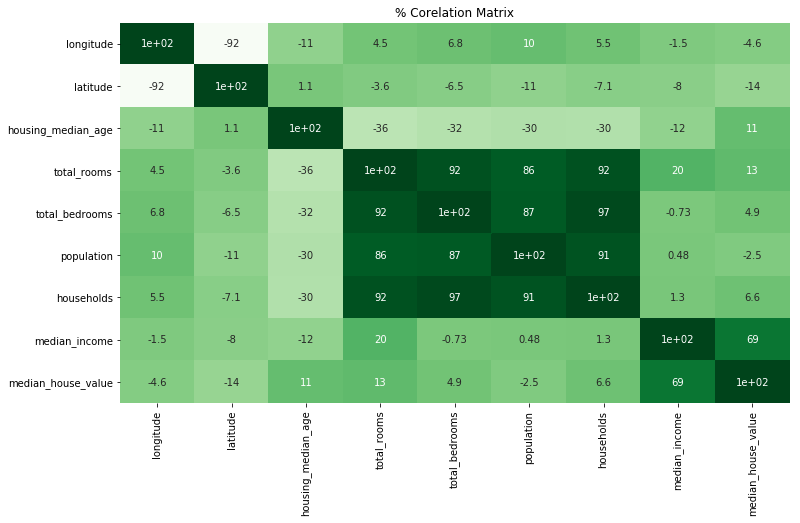

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='Greens')
plt.title('% Corelation Matrix')
plt.show()

In [12]:
#Data Munging

#Remove outliers
df = df[df["ocean_proximity"] != "ISLAND"]

le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'].astype(str))

In [13]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_household'] = df['total_bedrooms']/df['households']
df['people_per_house'] = df['population'] / df['households']

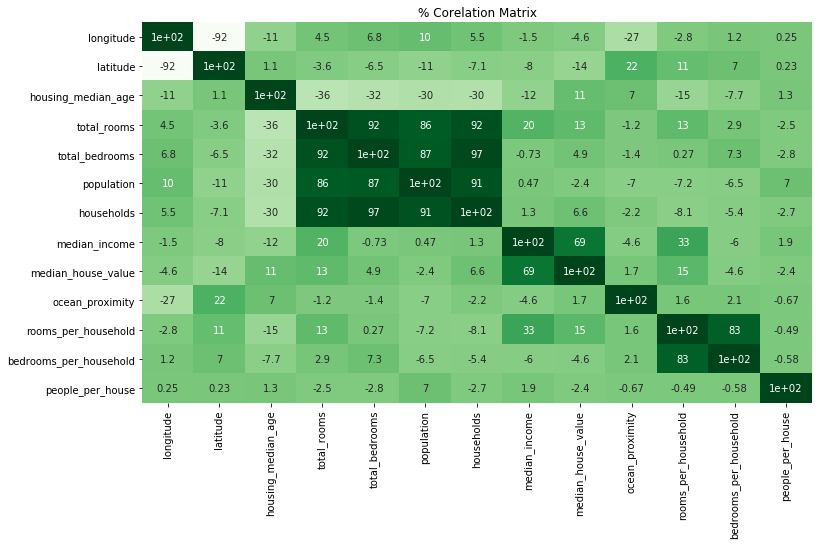

In [14]:
#Lets look at the correlation matrix again after munging the data
plt.figure(figsize=(12,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='Greens')
plt.title('% Corelation Matrix')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score

def regressionModel(model, x, y):
    #Fit model and perfrom 10 fold cross validation
    mean_squared_errors = cross_val_score(model, x, y, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')
    print ("Mean Squared Error: ", np.mean(mean_squared_errors))
    print("Root Mean Squared Error:", np.sqrt(np.absolute(np.mean(mean_squared_errors))))
    
    r_squared_value = cross_val_score(model, x, y, n_jobs=-1, cv=10, scoring='r2')
    print ("R2 Score: ", np.mean(r_squared_value))
    #We are looking for a low mean squared error and high R2 Score
    
    #We should plot these values on a chart somehow to understand them...


In [16]:
outcome = 'median_house_value'
predictors = ['ocean_proximity','total_rooms','median_income', 'housing_median_age' ]
model = LinearRegression()

regressionModel(model, df[predictors], df[outcome])

Mean Squared Error:  -6817981571.513113
Root Mean Squared Error: 82571.06982177906
R2 Score:  0.38494711199883747


In [17]:
outcome = 'median_house_value'
predictors = ['ocean_proximity','people_per_house','median_income', 'housing_median_age', 'rooms_per_household',
              'longitude']
model = DecisionTreeRegressor(random_state=0)

regressionModel(model, df[predictors], df[outcome])

Mean Squared Error:  -7563312603.64504
Root Mean Squared Error: 86967.30767159024
R2 Score:  0.2880305348750763


In [18]:
outcome = 'median_house_value'
predictors = ['ocean_proximity','people_per_house','median_income', 'housing_median_age', 'rooms_per_household',
              'longitude']
model = RandomForestRegressor(n_estimators=50,random_state=0)

regressionModel(model, df[predictors], df[outcome])

Mean Squared Error:  -4238501179.204075
Root Mean Squared Error: 65103.77238842673
R2 Score:  0.6098669883219696


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

outcome = 'median_house_value'
predictors = ['ocean_proximity','people_per_house','median_income', 'housing_median_age', 'rooms_per_household',
              'longitude']
predictor_values = df[predictors]
scaled_array = scaler.fit_transform(predictor_values)

model = RandomForestRegressor(n_estimators=50,random_state=0)
regressionModel(model, scaled_array, df[outcome])

Mean Squared Error:  -4238700503.68667
Root Mean Squared Error: 65105.30319172679
R2 Score:  0.6097861278234326


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

outcome = 'median_house_value'
predictors = ['ocean_proximity','people_per_house','median_income', 'housing_median_age', 'rooms_per_household',
              'longitude']
model = GradientBoostingRegressor()

regressionModel(model, df[predictors], df[outcome])

Mean Squared Error:  -4098661253.439513
Root Mean Squared Error: 64020.7876665034
R2 Score:  0.62680151589165


In [22]:
from sklearn.preprocessing import OneHotEncoder
x=df.iloc[:,:-1].values
y=df['median_house_value'].values
print(x[0])
#onehotencoder = OneHotEncoder(categorical_features = [8])
#x = onehotencoder.fit_transform(x).toarray()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain,ytrain)

predictions = linear_regressor.predict(xtest)
lin_mse = mean_squared_error(ytest,predictions)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean Squared Error:", lin_rmse)
print("R2 Score:", linear_regressor.score(xtest, ytest))


[-1.22230000e+02  3.78800000e+01  4.10000000e+01  8.80000000e+02
  1.29000000e+02  3.22000000e+02  1.26000000e+02  8.32520000e+00
  4.52600000e+05  2.00000000e+00  6.98412698e+00  1.02380952e+00]
Root Mean Squared Error: 1.7563848260160124e-10
R2 Score: 1.0
